In [1]:
#importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



###### Click here to see my github profile: https://github.com/bhanubokkasam

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [3]:
#train file
df1= pd.read_csv('train.csv')
df1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
#meal info
df2= pd.read_csv('meal_info.csv')
df2.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
df3= pd.read_csv('fulfilment_center_info.csv')
df3.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


#### Merging all data frames into one df

In [6]:
df_merge1 = pd.merge(df1, df2 , on='meal_id')
df_merge1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai


In [7]:
df = pd.merge(df_merge1, df3 , on='center_id')
df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [9]:
df.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

In [10]:
df['id'].duplicated().sum()

0

## Exploratory Data Analysis

Please find EDA pdf here: https://github.com/bhanubokkasam/Food_Demand_Forecasting

<AxesSubplot:>

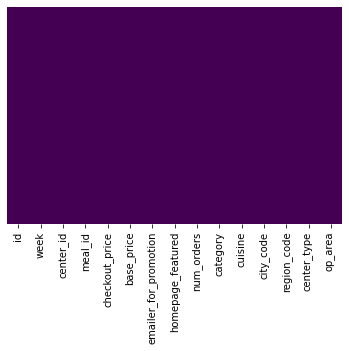

In [11]:
#for checking null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


#### Our output (target) variable is num_orders
If we see correlation with it, main features which has high correlation are:
###### Checkout_price
###### base_price
###### Emailer_promotion
###### Homepage_freatured
###### Op_area

###### Let’s se all features comparison.

<AxesSubplot:>

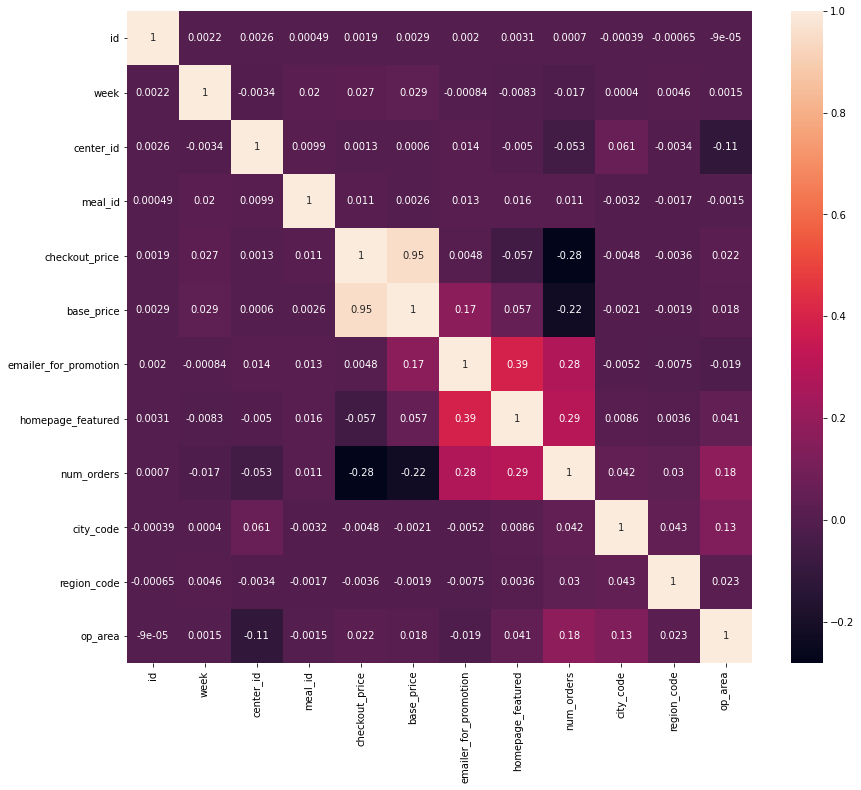

In [13]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

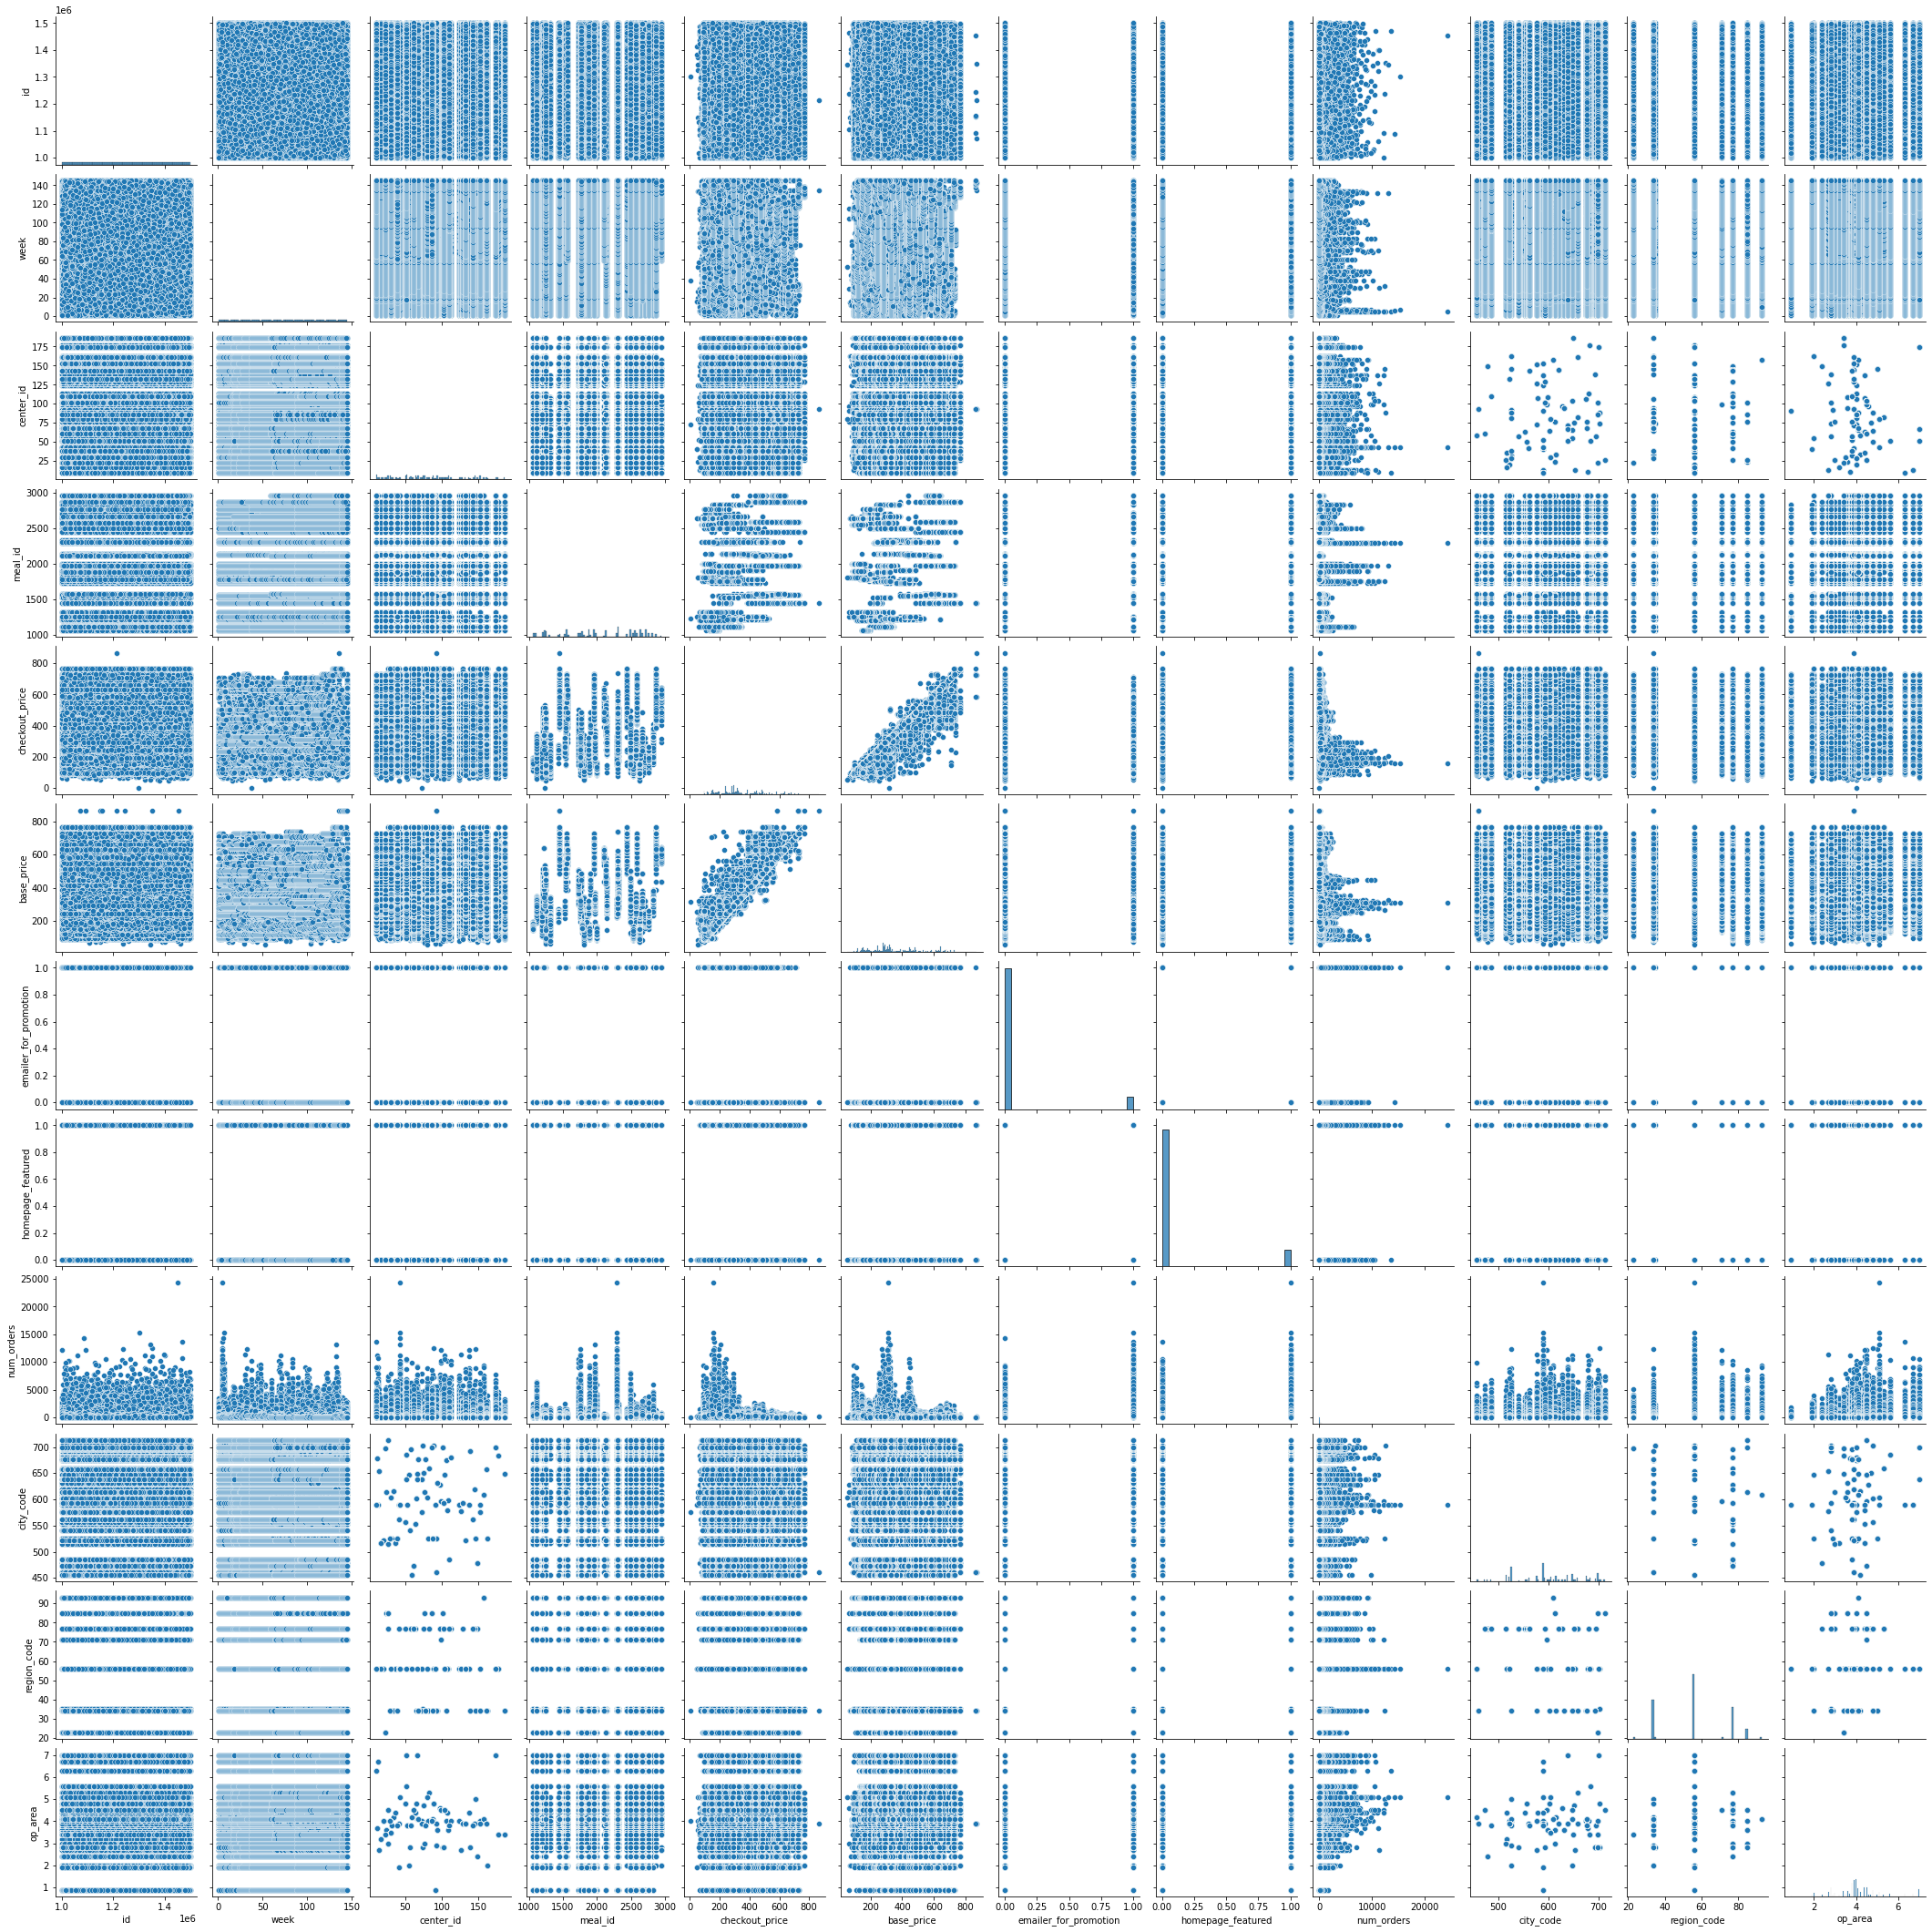

In [14]:
sns.pairplot(df)

<AxesSubplot:xlabel='num_orders', ylabel='Density'>

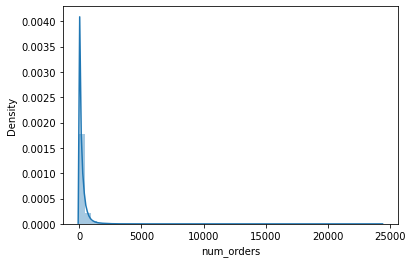

In [15]:
sns.distplot(df['num_orders'])
#here it is +ve skewed and here according to pdf max values are from 0 to 2000

<AxesSubplot:xlabel='center_id', ylabel='Density'>

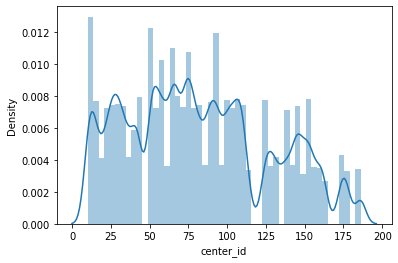

In [16]:
sns.distplot(df['center_id'],kde=True)

<AxesSubplot:xlabel='week', ylabel='Density'>

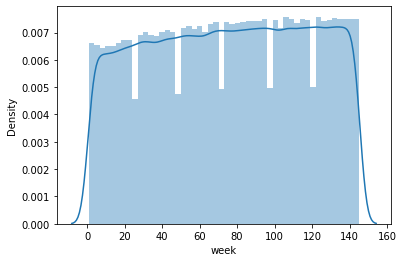

In [17]:
sns.distplot(df['week'],kde=True)

#### If we see week column. In some weeks (i.e 22,44,66,88,12) we are getting very less orders compared to other . This means after some weeks they are getting less orders. Maximum weeks they are getting less than 5000.


<AxesSubplot:xlabel='meal_id', ylabel='Density'>

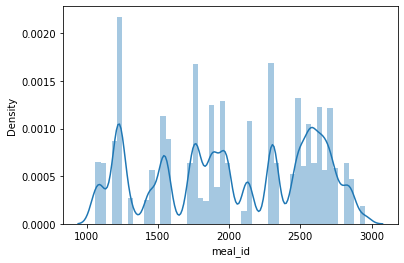

In [18]:
sns.distplot(df['meal_id'],kde=True)

<AxesSubplot:xlabel='checkout_price', ylabel='Density'>

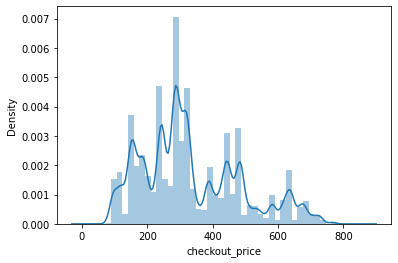

In [19]:
sns.distplot(df['checkout_price'],kde=True)

<AxesSubplot:xlabel='base_price', ylabel='Density'>

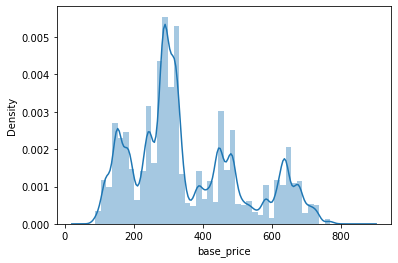

In [20]:
sns.distplot(df['base_price'],kde=True)

<AxesSubplot:xlabel='city_code', ylabel='Density'>

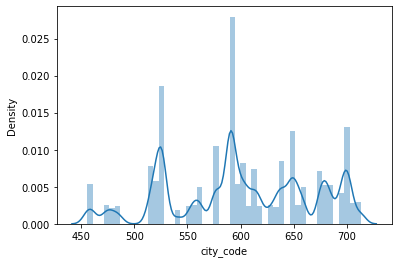

In [21]:
sns.distplot(df['city_code'],kde=True)

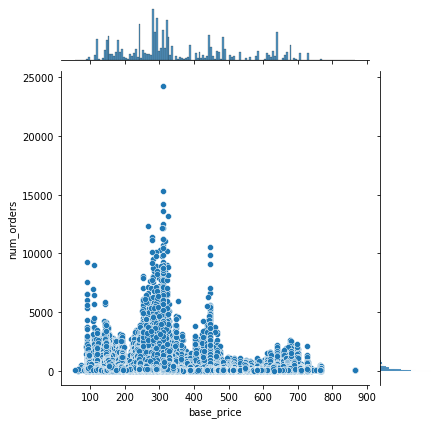

In [22]:
sns.jointplot(x='base_price',y='num_orders',data=df)

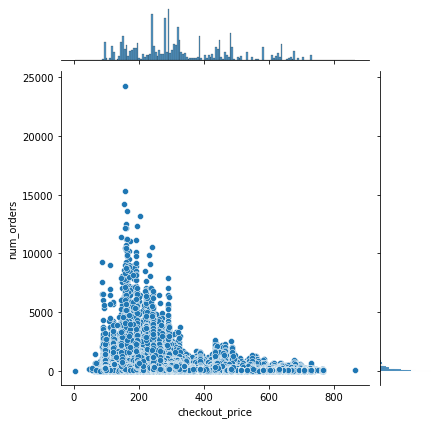

In [23]:
sns.jointplot(x='checkout_price',y='num_orders',data=df)

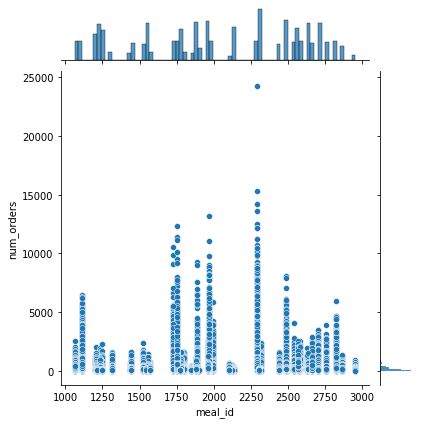

In [24]:

sns.jointplot(x='meal_id',y='num_orders',data=df)

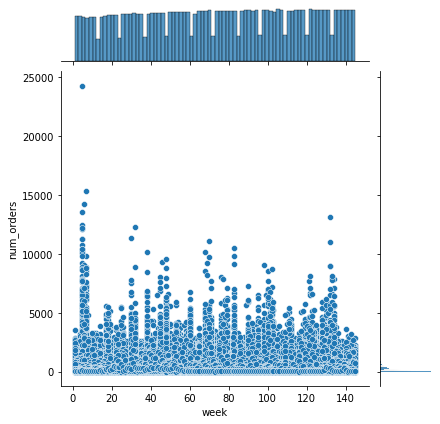

In [25]:
sns.jointplot(x='week',y='num_orders',data=df)

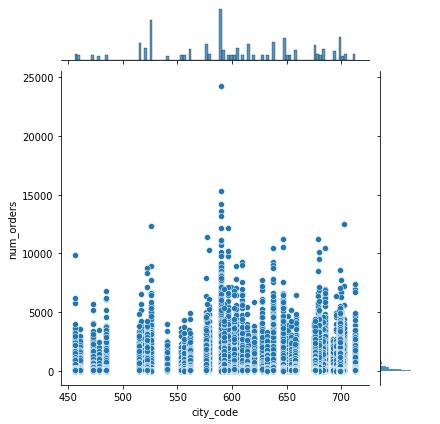

In [26]:
sns.jointplot(x='city_code',y='num_orders',data=df)

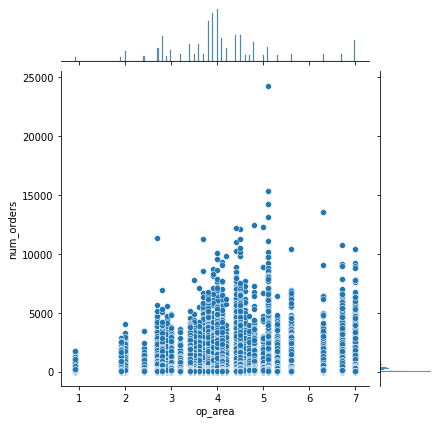

In [27]:
sns.jointplot(x='op_area',y='num_orders',data=df)

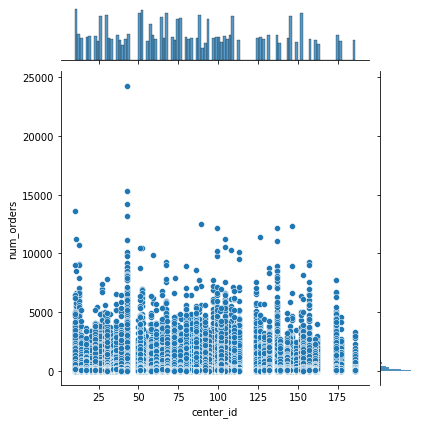

In [28]:
sns.jointplot(x='center_id',y='num_orders',data=df)

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='num_orders'>

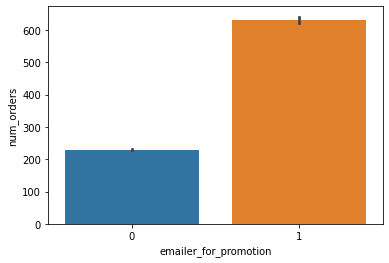

In [29]:
#relation between num_orders and emailer_for_promotion....
#this shows if the mail has sent there are more no of orders
sns.barplot(x = 'emailer_for_promotion',y = 'num_orders',data =df)

<AxesSubplot:xlabel='homepage_featured', ylabel='num_orders'>

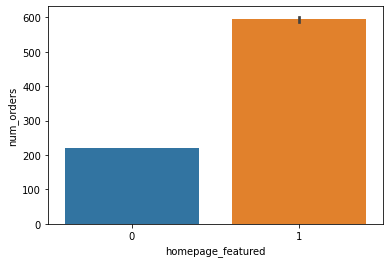

In [30]:
sns.barplot(x = 'homepage_featured',y = 'num_orders',data =df)

<AxesSubplot:xlabel='category', ylabel='num_orders'>

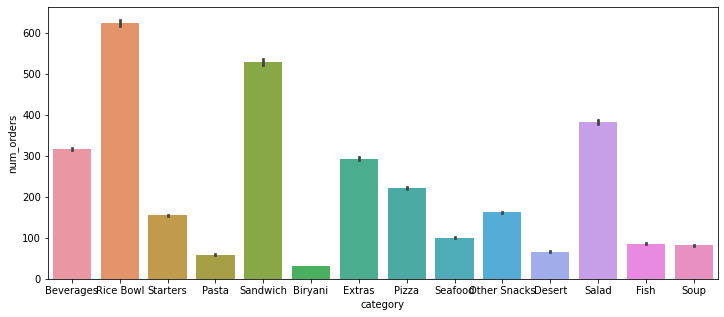

In [31]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'category',y = 'num_orders',data =df)

<AxesSubplot:xlabel='cuisine', ylabel='num_orders'>

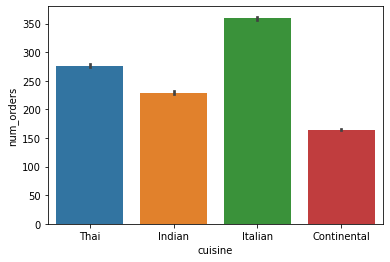

In [32]:
sns.barplot(x = 'cuisine',y = 'num_orders',data =df)

<AxesSubplot:xlabel='region_code', ylabel='num_orders'>

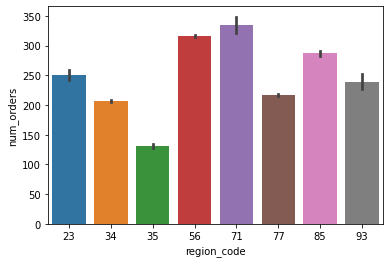

In [33]:
sns.barplot(x = 'region_code',y = 'num_orders',data =df)

<AxesSubplot:xlabel='center_type', ylabel='num_orders'>

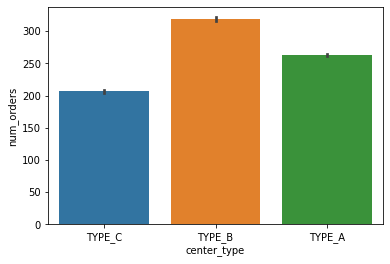

In [34]:
sns.barplot(x = 'center_type',y = 'num_orders',data =df)

<AxesSubplot:xlabel='op_area', ylabel='num_orders'>

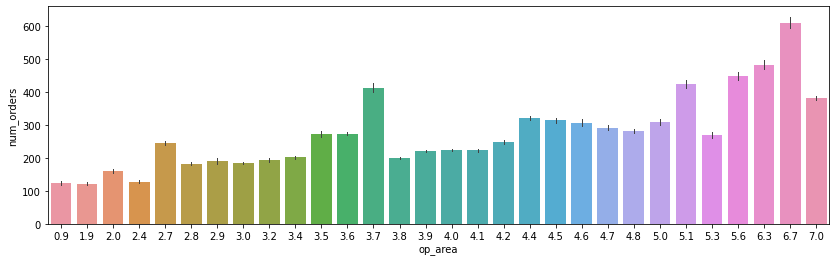

In [35]:
plt.figure(figsize=(14,4))
sns.barplot(x = 'op_area',y = 'num_orders',data =df,errwidth = 1)

## feature engineering

In [11]:
#for checking outliers
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [12]:
a=df['base_price']
a

0         152.29
1         152.29
2         133.92
3         134.86
4         147.50
           ...  
456543    630.53
456544    582.03
456545    581.03
456546    581.03
456547    582.03
Name: base_price, Length: 456548, dtype: float64

In [13]:
b=df['checkout_price']
c=df['num_orders']

In [14]:
detect_outliers(a)

[866.27, 865.27, 864.27, 865.27, 866.27, 866.27, 865.27, 865.27]

In [15]:
detect_outliers(b)#we are going to log for both of this

[866.27, 865.27, 864.27, 865.27, 866.27, 866.27, 865.27, 865.27, 866.27]

In [16]:
detect_outliers(c) #we will do log transformation

[866.27,
 865.27,
 864.27,
 865.27,
 866.27,
 866.27,
 865.27,
 865.27,
 866.27,
 3280,
 1970,
 1770,
 2240,
 1458,
 1999,
 2119,
 1916,
 1527,
 1607,
 1849,
 2362,
 1485,
 1689,
 1566,
 1849,
 2052,
 1972,
 2580,
 1905,
 2714,
 2160,
 2376,
 1554,
 2133,
 1741,
 2375,
 2930,
 1457,
 1498,
 1485,
 1836,
 1647,
 2322,
 1931,
 1890,
 1606,
 1458,
 1620,
 1660,
 1916,
 1580,
 1552,
 1700,
 2402,
 1891,
 1808,
 1458,
 1648,
 1513,
 1620,
 1647,
 1565,
 1756,
 1511,
 1511,
 1511,
 1554,
 1891,
 1592,
 1701,
 1581,
 1972,
 1877,
 1958,
 1984,
 1890,
 1607,
 1635,
 1513,
 1552,
 1700,
 2431,
 2121,
 1566,
 1635,
 1457,
 1674,
 1471,
 1755,
 1742,
 1608,
 1647,
 1795,
 1621,
 1687,
 1553,
 1660,
 1755,
 1486,
 1594,
 1592,
 1594,
 1918,
 1783,
 1608,
 1580,
 5454,
 3064,
 1795,
 2146,
 1878,
 1824,
 3969,
 2688,
 3266,
 3079,
 1567,
 2877,
 2538,
 1662,
 1459,
 1567,
 3281,
 1754,
 1526,
 2025,
 1620,
 1499,
 2228,
 3740,
 2402,
 1768,
 1486,
 2094,
 2107,
 2471,
 1849,
 1472,
 3430,
 2632,
 1

<AxesSubplot:ylabel='base_price'>

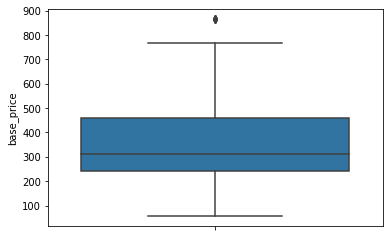

In [17]:
sns.boxplot(y = 'base_price', data = df)

<AxesSubplot:ylabel='checkout_price'>

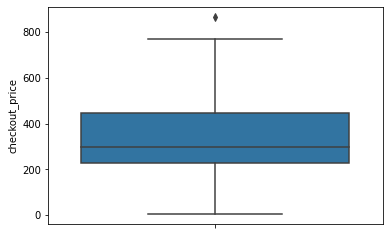

In [18]:
sns.boxplot(y = 'checkout_price', data = df)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

## Encoding

In [19]:
#using label encoding
categ = ['category', 'cuisine','center_type']
from sklearn.preprocessing import LabelEncoder
# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  int32  
 10  cuisine                456548 non-null  int32  
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  int32  
 14  op_area                456548 non-nu

<AxesSubplot:>

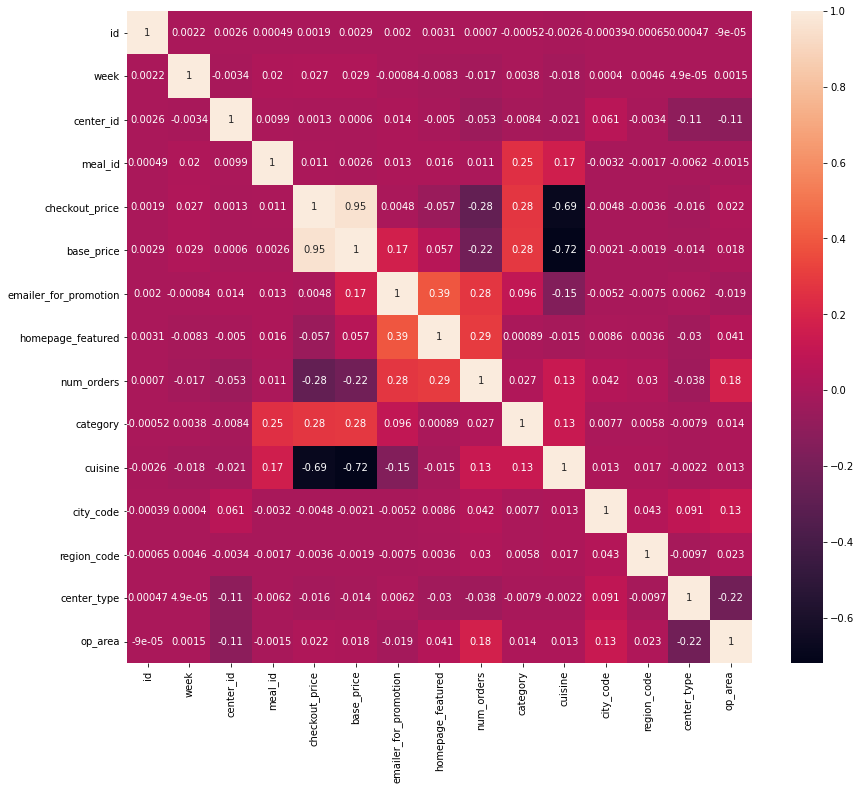

In [47]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

## making some new features and Feature selection

#### these are some features but i tried using them but each and all but got good result with some features.

In [21]:
train_data=df.copy()

In [22]:
train_data.shape

(456548, 15)

#### Below feature is between meal and week. Because, in some seasons there is some type of food is most ordered. for example ice-cream is most ordered in summer.

In [23]:
grpby_df = train_data.groupby(["meal_id", "week"])["id"].count().reset_index() 
grpby_df.columns = ["meal_id", "week", "meal_week_count"]
train_data = pd.merge(train_data,grpby_df, on=["meal_id", "week"], how="left")

#### Below feature is relation between meal week and center. This shows in some places in there will be high demand in some food based on season  

In [24]:
grpby_df =train_data.groupby(["center_type", "meal_id", "week"])["id"].count().reset_index()
grpby_df.columns = ["center_type", "meal_id", "week", "type_meal_week_count"]
train_data = pd.merge(train_data,grpby_df, on=["center_type", "meal_id", "week"], how="left")

#### Below feature is between center and meal with home featured. some centers and food id are featured in home page these is can be highly ordered because of advertisement.

In [25]:
grpby_df = train_data.groupby(['center_id','meal_id'])['homepage_featured'].mean()
grpby_df = grpby_df.reset_index()
grpby_df = grpby_df.rename(columns={'homepage_featured':'avg_homepage_featured'})
train_data = pd.merge(train_data,grpby_df, how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])

#### There is some outliers on both of them so making log. Making discount, discount average features, discount on base, discount yes or no

In [26]:
train_data['checkout_price'] = np.log1p(train_data['checkout_price'])
train_data['base_price'] = np.log1p(train_data['base_price'])
train_data['discount_on_base'] = (train_data['base_price'] - train_data['checkout_price']) / train_data['base_price']

In [27]:
train_data["discount_ratio"] = train_data["base_price"] / train_data["checkout_price"]
train_data['discount'] = (train_data['base_price'] - train_data['checkout_price'])

In [28]:
train_data['discount_y/n'] = [1 if x>0 else 0 for x in (train_data['base_price']-train_data['checkout_price'])]

#### Making comparision between weeks. this means there can be huge sales in some weeks. we can find difference between them

In [29]:
train_data['compare_week_price'] = train_data['checkout_price'] - train_data['checkout_price'].shift(1)

<AxesSubplot:>

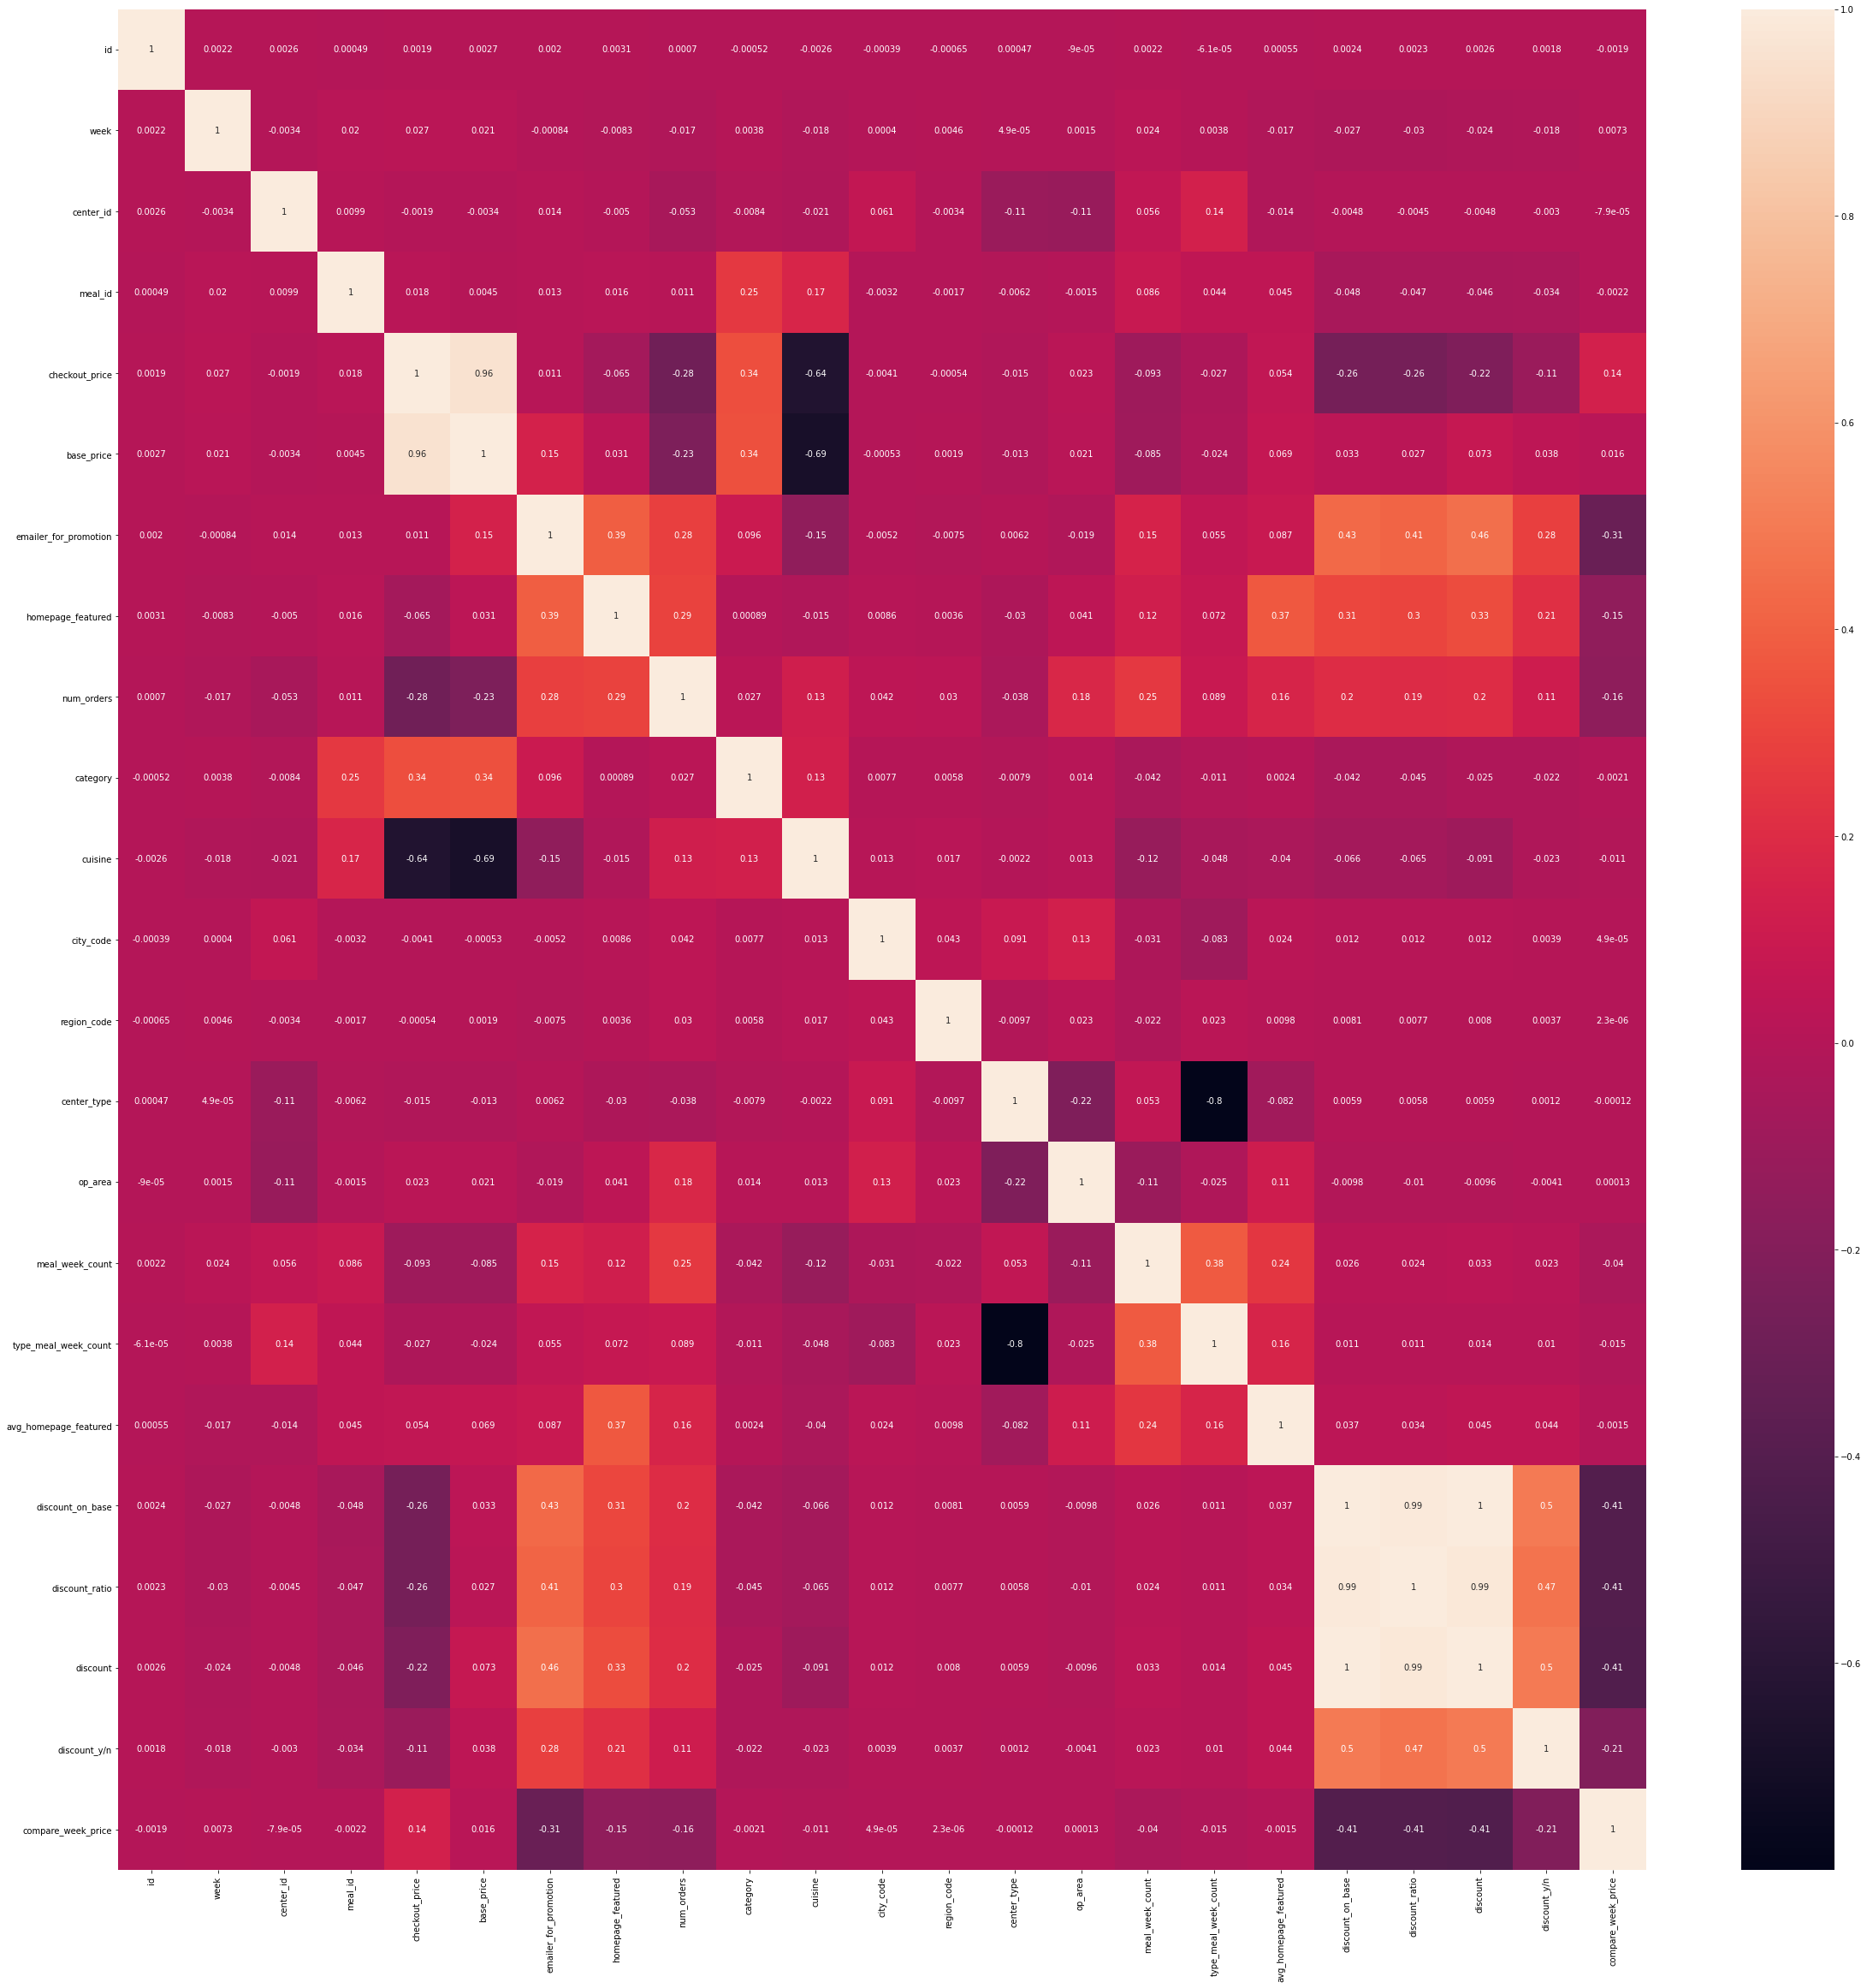

In [30]:
plt.figure(figsize=(40,40)) #corellation is there but when i am keeping them i am not getting desired result
sns.heatmap(train_data.corr(),annot=True)

In [31]:
abs(train_data.corr()['num_orders']).sort_values(ascending=False)

num_orders               1.000000
homepage_featured        0.294490
checkout_price           0.279912
emailer_for_promotion    0.277147
meal_week_count          0.248871
base_price               0.225686
discount_on_base         0.201738
discount                 0.201139
discount_ratio           0.194291
op_area                  0.176976
avg_homepage_featured    0.159657
compare_week_price       0.156584
cuisine                  0.127653
discount_y/n             0.111766
type_meal_week_count     0.088812
center_id                0.053035
city_code                0.041596
center_type              0.038199
region_code              0.029744
category                 0.026520
week                     0.017210
meal_id                  0.010597
id                       0.000702
Name: num_orders, dtype: float64

In [32]:
train_data.info()#there is null value in compare_week_price

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  int32  
 10  cuisine                456548 non-null  int32  
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  int32  
 14  op_area                456548 non-nu

In [33]:
mean_value=train_data['compare_week_price'].mean()
train_data['compare_week_price'].fillna(value=mean_value, inplace=True) #.....Null values replaced with mean........

In [34]:
abs(train_data.corr()['num_orders']).sort_values(ascending=False)#........FINAL CORELLATION

num_orders               1.000000
homepage_featured        0.294490
checkout_price           0.279912
emailer_for_promotion    0.277147
meal_week_count          0.248871
base_price               0.225686
discount_on_base         0.201738
discount                 0.201139
discount_ratio           0.194291
op_area                  0.176976
avg_homepage_featured    0.159657
compare_week_price       0.156584
cuisine                  0.127653
discount_y/n             0.111766
type_meal_week_count     0.088812
center_id                0.053035
city_code                0.041596
center_type              0.038199
region_code              0.029744
category                 0.026520
week                     0.017210
meal_id                  0.010597
id                       0.000702
Name: num_orders, dtype: float64

### Feature selection
#### here i tried with different combinations but these are only features good for model

In [62]:
train_data.drop(['type_meal_week_count','avg_homepage_featured', 'discount_on_base','discount_y/n','compare_week_price'], axis = 1,inplace=True)

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  int32  
 10  cuisine                456548 non-null  int32  
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  int32  
 14  op_area                456548 non-nu

In [35]:
train_data['num_orders']=np.log1p(train_data['num_orders']) #.........making LOG TRANSFORMATION for removing outliers


<AxesSubplot:>

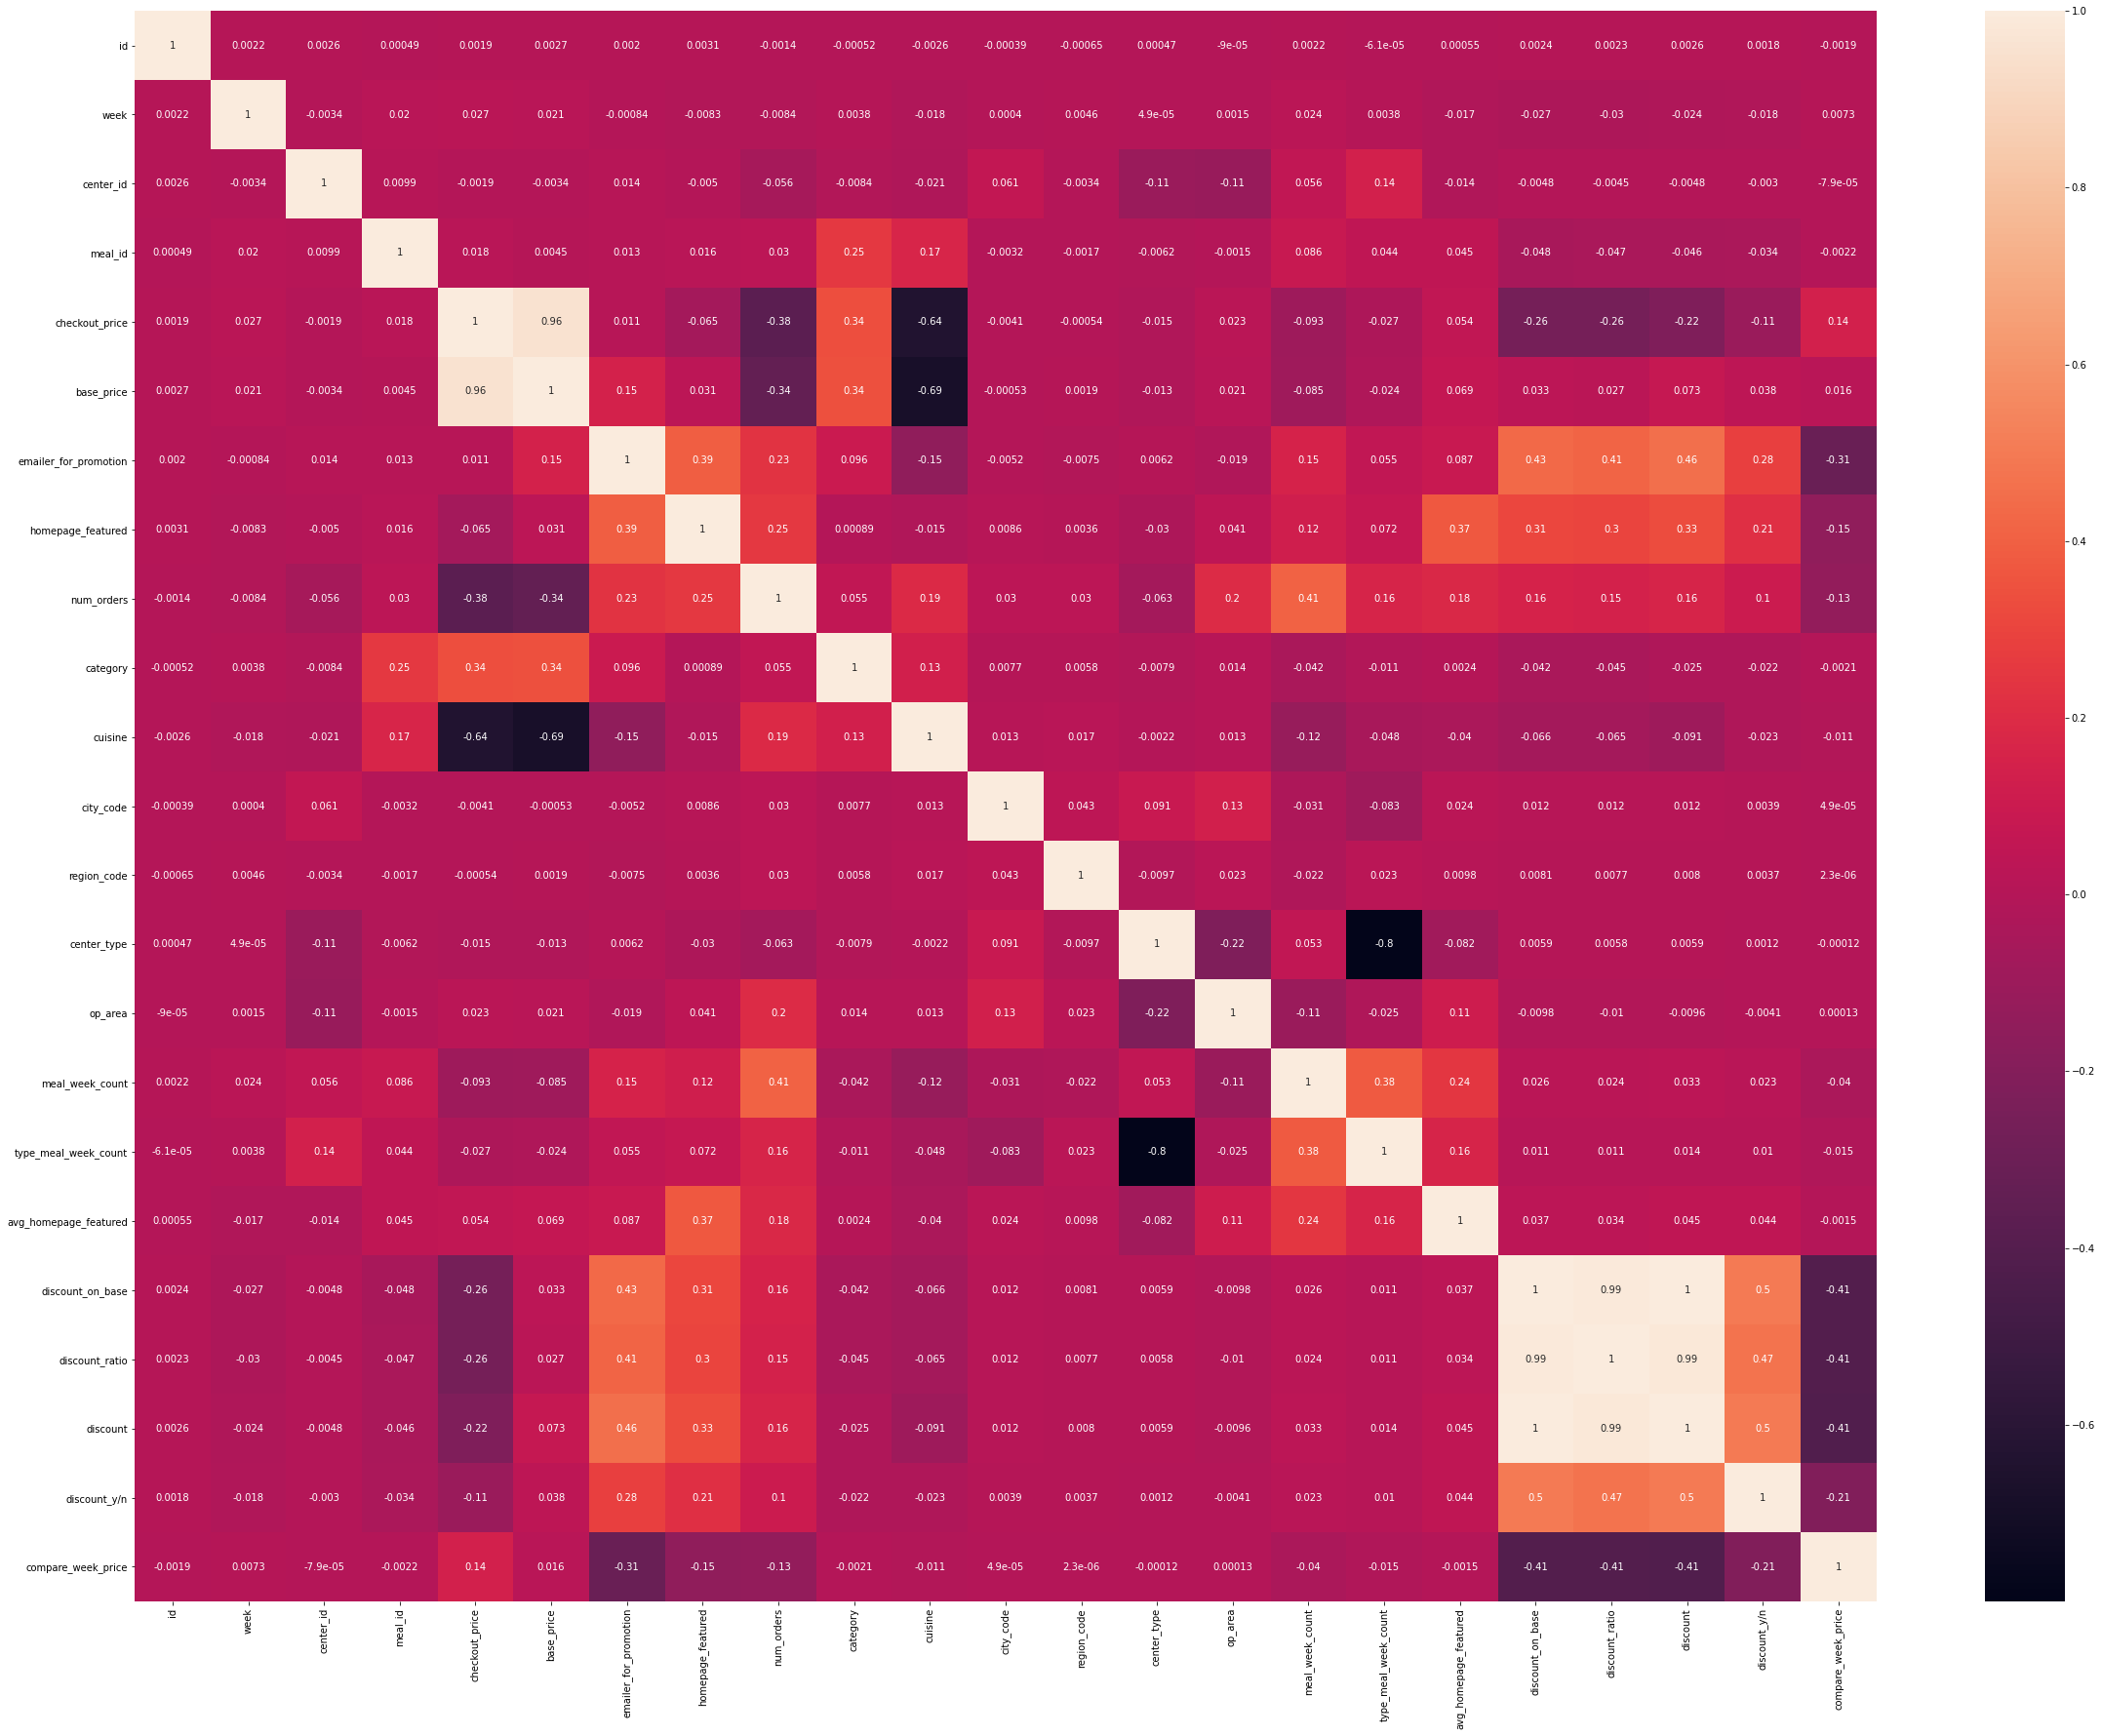

In [36]:
plt.figure(figsize=(40,30))
sns.heatmap(train_data.corr(),annot=True)#............highly corellated feature is meal_week_count(DERIVED FEATURE)

In [37]:
train_data.info()                          #final features for model

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  float64
 9   category               456548 non-null  int32  
 10  cuisine                456548 non-null  int32  
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  int32  
 14  op_area                456548 non-nu

In [38]:
train_data.to_pickle('all_fea.pkl')

#### splitting

In [39]:
# X --> contains the dataframe without the target i.e price
x = train_data.drop('num_orders',axis=1)

# y --> contains only the target value 
y = train_data['num_orders']

In [40]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0 )

In [41]:
x_train.shape ,x_test.shape ,y_train.shape , y_test.shape

((319583, 22), (136965, 22), (319583,), (136965,))

## Feature Selection(RFE)

In [54]:
import lightgbm as lgb
from catboost import CatBoostRegressor as cbr
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = lgb.LGBMRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)


In [55]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['center_id', 'meal_id', 'checkout_price', 'base_price', 'category',
       'cuisine', 'city_code', 'op_area', 'meal_week_count',
       'avg_homepage_featured'],
      dtype='object')


### model

In [50]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

In [56]:
cb=CatBoostRegressor(
    iterations=1700, 
    learning_rate=0.036, 
    max_depth=12, 
    l2_leaf_reg=10,
    loss_function='RMSE',
    random_seed=2000,
    od_type='Iter',
    od_wait=25,
    verbose=100,
    subsample=0.25
    
    )

cb.fit(x_train,y_train)

print('Train Score :',cb.score(x_train,y_train))
print('Test Score :',cb.score(x_test,y_test))

y_pred = cb.predict(x_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('rmsle: ', mean_squared_log_error(y_test,y_pred) )     #50.0875283203

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 1.1739877	total: 160ms	remaining: 4m 32s
100:	learn: 0.5445232	total: 14.8s	remaining: 3m 54s
200:	learn: 0.5021065	total: 29s	remaining: 3m 36s
300:	learn: 0.4827470	total: 46.2s	remaining: 3m 34s
400:	learn: 0.4700712	total: 1m 3s	remaining: 3m 26s
500:	learn: 0.4601934	total: 1m 22s	remaining: 3m 18s
600:	learn: 0.4527635	total: 1m 43s	remaining: 3m 8s
700:	learn: 0.4460626	total: 2m 3s	remaining: 2m 56s
800:	learn: 0.4402604	total: 2m 23s	remaining: 2m 41s
900:	learn: 0.4348305	total: 2m 44s	remaining: 2m 25s
1000:	learn: 0.4298828	total: 3m 4s	remaining: 2m 8s
1100:	learn: 0.4250498	total: 3m 25s	remaining: 1m 51s
1200:	learn: 0.4203299	total: 3m 49s	remaining: 1m 35s
1300:	learn: 0.4159207	total: 4m 10s	remaining: 1m 16s
1400:	learn: 0.4117646	total: 4m 30s	remaining: 57.8s
1500:	learn: 0.4076895	total: 4m 51s	remaining: 38.7s
1600:	learn: 0.4038379	total: 5m 12s	remaining: 19.3s
1699:	learn: 0.4002024	total: 5m 34s	remaining: 0us
Train Score : 0.8893149520081012
Test S



### 50.0875283203  is Final RMSLE value in Analytics Vidhya

### making main test

In [57]:
test1= pd.read_csv('test.csv')
test2= pd.read_csv('meal_info.csv')
test3= pd.read_csv('fulfilment_center_info.csv')
test_merge1 = pd.merge(test1, test2 , on='meal_id')
main_test = pd.merge(test_merge1, test3 , on='center_id')
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   category               32573 non-null  object 
 9   cuisine                32573 non-null  object 
 10  city_code              32573 non-null  int64  
 11  region_code            32573 non-null  int64  
 12  center_type            32573 non-null  object 
 13  op_area                32573 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

In [58]:
grpby_df = main_test.groupby(["meal_id", "week"])["id"].count().reset_index()
grpby_df.columns = ["meal_id", "week", "meal_week_count"]
main_test = pd.merge(main_test,grpby_df, on=["meal_id", "week"], how="left")

In [59]:
main_test['checkout_price'] = np.log1p(main_test['checkout_price'])
main_test['base_price'] = np.log1p(main_test['base_price'])

In [60]:
main_test["discount_ratio"] = main_test["base_price"] / main_test["checkout_price"]
main_test['discount'] = (main_test['base_price'] - main_test['checkout_price'])

In [61]:
#categ = ['category', 'cuisine','center_type']
le = LabelEncoder()
le.fit(main_test['category'])

main_test['category'] = le.transform(main_test['category'])

In [62]:
le = LabelEncoder()
le.fit(main_test['cuisine'])

main_test['cuisine'] = le.transform(main_test['cuisine'])

In [63]:
le = LabelEncoder()
le.fit(main_test['center_type'])

main_test['center_type'] = le.transform(main_test['center_type'])

In [64]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   category               32573 non-null  int32  
 9   cuisine                32573 non-null  int32  
 10  city_code              32573 non-null  int64  
 11  region_code            32573 non-null  int64  
 12  center_type            32573 non-null  int32  
 13  op_area                32573 non-null  float64
 14  meal_week_count        32573 non-null  int64  
 15  di

In [65]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319583 entries, 358332 to 305711
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     319583 non-null  int64  
 1   week                   319583 non-null  int64  
 2   center_id              319583 non-null  int64  
 3   meal_id                319583 non-null  int64  
 4   checkout_price         319583 non-null  float64
 5   base_price             319583 non-null  float64
 6   emailer_for_promotion  319583 non-null  int64  
 7   homepage_featured      319583 non-null  int64  
 8   category               319583 non-null  int32  
 9   cuisine                319583 non-null  int32  
 10  city_code              319583 non-null  int64  
 11  region_code            319583 non-null  int64  
 12  center_type            319583 non-null  int32  
 13  op_area                319583 non-null  float64
 14  meal_week_count        319583 n

In [ ]:
main_pred = cb.predict(main_test)

In [82]:
pred= pd.Series(main_pred,name='num_orders')

In [83]:
Result=pd.DataFrame(main_pred)
Result=np.expm1(Result).astype('int64') #here we are making exponential because we are doing log to our target variable


In [84]:
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = main_test['id']
Submission['num_orders'] = Result.values
Submission.to_csv('fdp_final_submission.csv', index=False)